# Q1: Implementing HITS and Pagerank algorithms

In [9]:
import networkx as nx
import numpy as np

# Load the directed graph from the edgelist (disregarding edge weights)
G = nx.read_edgelist('S:/Fall_24/SNA/Assignment 3/congress_network/congress_network/congress.edgelist', create_using=nx.DiGraph(), data=False)

# Initialize hub and authority scores
nodes = list(G.nodes())
num_nodes = len(nodes)
hub_scores = {node: 1.0 for node in nodes}
authority_scores = {node: 1.0 for node in nodes}

# Create adjacency matrices for easier computation
adj_matrix = nx.to_numpy_array(G, nodelist=nodes, dtype=float)
adj_matrix_T = adj_matrix.T

# Define parameters
max_iter = 1000  # Maximum number of iterations
tol = 1e-6  # Tolerance for convergence

# Jacobi method for HITS
def jacobi_hits(adj_matrix, adj_matrix_T, hub_scores, authority_scores, num_nodes, tol, max_iter):
    for _ in range(max_iter):
        new_authority_scores = np.zeros(num_nodes)
        new_hub_scores = np.zeros(num_nodes)

        # Update authority scores: A = M^T * H
        for i in range(num_nodes):
            new_authority_scores[i] = np.sum(adj_matrix_T[i, :] * list(hub_scores.values()))

        # Update hub scores: H = M * A
        for i in range(num_nodes):
            new_hub_scores[i] = np.sum(adj_matrix[i, :] * new_authority_scores)

        # Normalize the scores
        new_authority_scores /= np.linalg.norm(new_authority_scores, 2)
        new_hub_scores /= np.linalg.norm(new_hub_scores, 2)

        # Check for convergence
        if (
            np.allclose(list(hub_scores.values()), new_hub_scores, atol=tol)
            and np.allclose(list(authority_scores.values()), new_authority_scores, atol=tol)
        ):
            break

        # Update the scores for the next iteration
        hub_scores = {node: new_hub_scores[i] for i, node in enumerate(nodes)}
        authority_scores = {node: new_authority_scores[i] for i, node in enumerate(nodes)}

    return hub_scores, authority_scores

# Compute HITS scores using Jacobi method
hub_scores, authority_scores = jacobi_hits(adj_matrix, adj_matrix_T, hub_scores, authority_scores, num_nodes, tol, max_iter)

#Pagerank

# Initialize parameters
damping_factor = 0.85
num_nodes = len(G.nodes())
tol = 1e-6  # Tolerance for convergence
max_iter = 1000  # Maximum number of iterations

# Get the adjacency matrix of the graph
adj_matrix = nx.to_numpy_array(G, nodelist=list(G.nodes()), dtype=float)

# Calculate the out-degree for each node
out_degree = np.sum(adj_matrix, axis=1)

# Handle dangling nodes (nodes with no out-links)
dangling_nodes = (out_degree == 0)
out_degree[dangling_nodes] = 1  # Avoid division by zero for dangling nodes

# Normalize the adjacency matrix by out-degree
transition_matrix = adj_matrix / out_degree[:, None]

# Initialize PageRank scores
pagerank_scores = np.full(num_nodes, 1 / num_nodes)

# Jacobi method for PageRank
def jacobi_method(transition_matrix, pagerank_scores, damping_factor, num_nodes, tol, max_iter):
    for _ in range(max_iter):
        new_pagerank_scores = np.zeros(num_nodes)
        for i in range(num_nodes):
            sum_scores = 0
            for j in range(num_nodes):
                if transition_matrix[j, i] != 0:
                    sum_scores += transition_matrix[j, i] * pagerank_scores[j]
            new_pagerank_scores[i] = (1 - damping_factor) / num_nodes + damping_factor * sum_scores

        # Check for convergence
        if np.linalg.norm(new_pagerank_scores - pagerank_scores, ord=1) < tol:
            break

        pagerank_scores = new_pagerank_scores

    return pagerank_scores

# Compute PageRank scores using Jacobi method
pagerank_scores = jacobi_method(transition_matrix, pagerank_scores, damping_factor, num_nodes, tol, max_iter)

# Map scores back to node labels
pagerank_scores_dict = {node: score for node, score in zip(G.nodes(), pagerank_scores)}




#Q1 : (a) --> Distribution of Hub and Authority scores of the nodes obtained from HITS algorithm

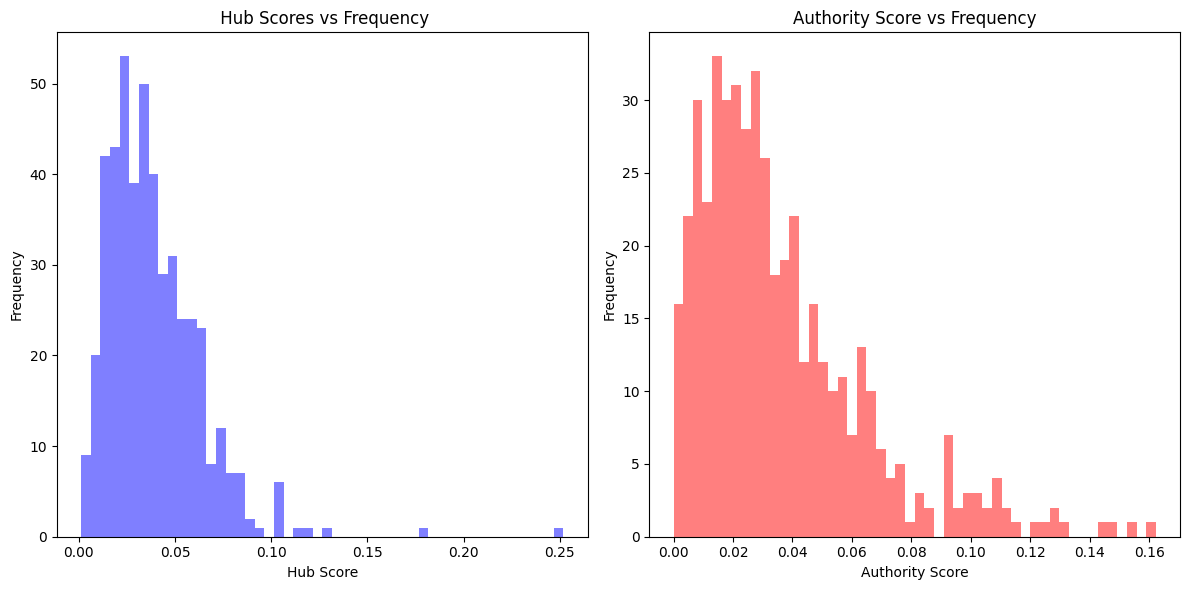

In [10]:
from matplotlib import pyplot as plt
# Extract hub and authority scores as lists
hub_values = list(hub_scores.values())
authority_values = list(authority_scores.values())

# Plot the distributions
plt.figure(figsize=(12, 6))

# Hub scores distribution
plt.subplot(1, 2, 1)
plt.hist(hub_values, bins=50, color='blue',alpha=0.5)
plt.title(' Hub Scores vs Frequency')
plt.xlabel('Hub Score')
plt.ylabel('Frequency')

# Authority scores distribution
plt.subplot(1, 2, 2)
plt.hist(authority_values, bins=50, color='red',alpha=0.5)
plt.title('Authority Score vs Frequency')
plt.xlabel('Authority Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Q1: (b) --> Compute the pearson’s correlation coefficient between the **hub scores** computed by  the HITS algorithm and the **pagerank scores**

#Q1: (c) --> Compute the pearson’s correlation coefficient between the **authority scores** computed by  the HITS algorithm and the **pagerank scores**


In [11]:
import networkx as nx
import numpy as np
from scipy.stats import pearsonr

# Function to align scores by node
def align_scores_by_node(scores_dict, nodes):
    return np.array([scores_dict[node] for node in nodes])

# Function to compute Pearson correlation
def compute_pearson_correlation(values1, values2):
    correlation, p_value = pearsonr(values1, values2)
    return correlation, p_value


nodes = list(G.nodes())
hub_values = align_scores_by_node(hub_scores, nodes)
authority_values = align_scores_by_node(authority_scores, nodes)
pagerank_values = align_scores_by_node(pagerank_scores_dict, nodes)

# Compute Pearson correlation between Hub and PageRank Scores
correlation_hub, p_hub_value = compute_pearson_correlation(hub_values, pagerank_values)
print(f"Pearson  Coefficient--> Hub and PageRank Scores: {correlation_hub:.4f}")
print(f"P-value: {p_hub_value:.4e}")

# Compute Pearson correlation between Authority Scores and PageRank Scores
correlation_authority, p_value_auth = compute_pearson_correlation(authority_values, pagerank_values)
print(f"Pearson Coefficient-->Authority and PageRank Scores: {correlation_authority:.4f}")
print(f"P-value : {p_value_auth:.4e}")


Pearson  Coefficient--> Hub and PageRank Scores: 0.5326
P-value: 3.6726e-36
Pearson Coefficient-->Authority and PageRank Scores: 0.9633
P-value : 2.6353e-272


# **Q2**

Number of communities: 2
Community size distribution: Counter({5048: 1, 2576: 1})


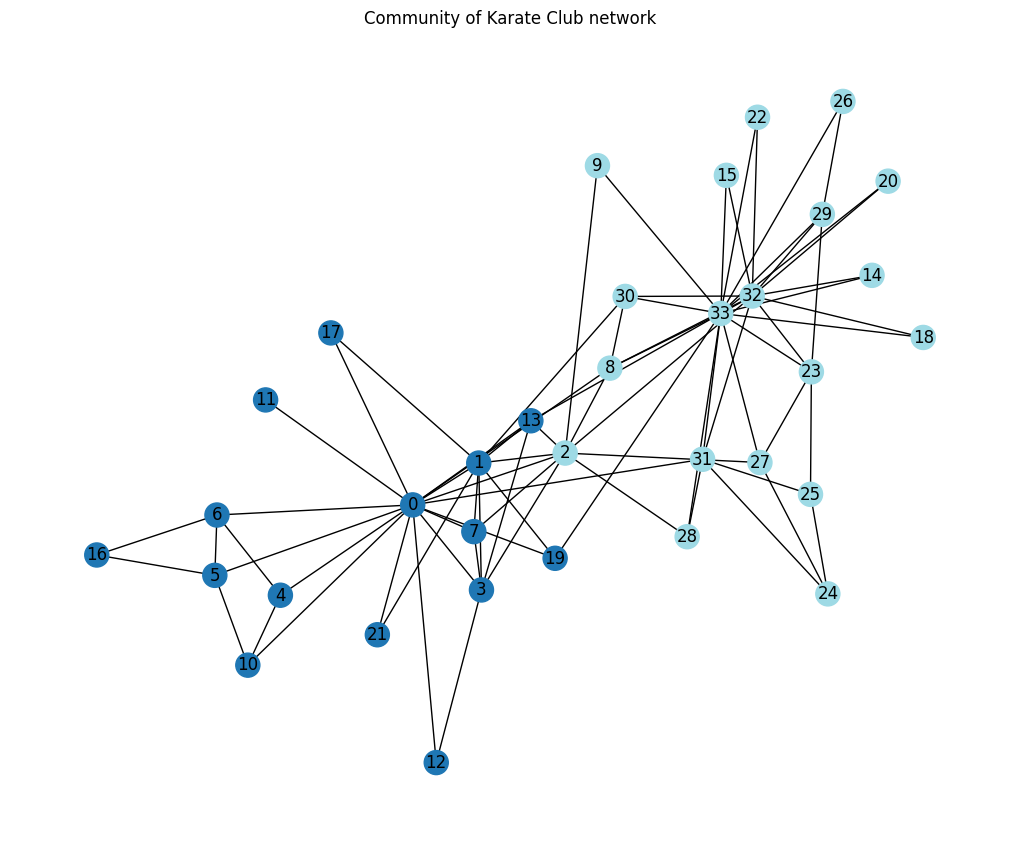

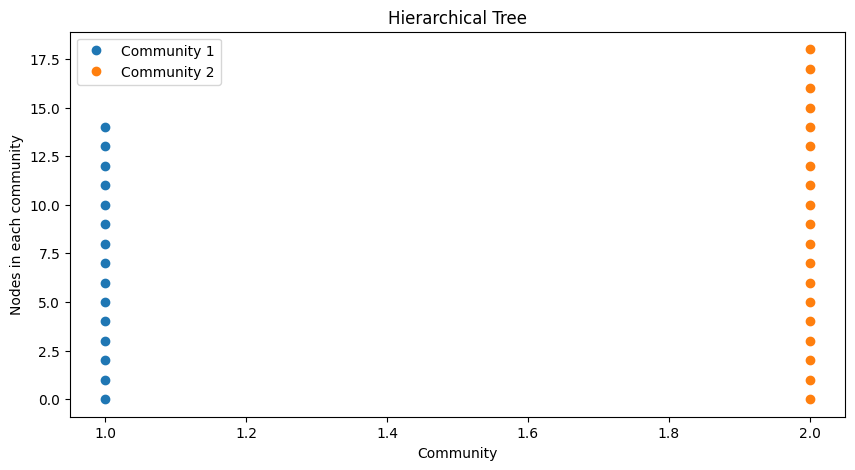

In [15]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from collections import Counter

def communities(G):
    comp = girvan_newman(G)
    comms = next(comp)
    return [list(c) for c in comms]
def graph(edges_path):
    edges = pd.read_csv(edges_path)
    return nx.from_pandas_edgelist(edges, source='node_1', target='node_2')

def plot(G, comms):
    color_map = {node: i for i, comm in enumerate(comms) for node in comm}
    node_colors = [color_map[node] for node in G.nodes()]

    plt.figure(figsize=(10, 8))
    nx.draw(G, node_color=node_colors, with_labels=True, cmap=plt.cm.tab20, node_size=300)
    plt.title("Community of Karate Club network")
    plt.show()

def hierarchy(comms):
    plt.figure(figsize=(10, 5))
    pos = 1
    for i, comm in enumerate(comms):
        plt.plot([pos] * len(comm), range(len(comm)), 'o', label=f'Community {i+1}')
        pos += 1
    plt.legend()
    plt.title("Hierarchical Tree")
    plt.xlabel("Community")
    plt.ylabel("Nodes in each community")
    plt.show()

def analyze(G):
    community = communities(G)
    num = len(community)
    comm_sizes = [len(c) for c in community]
    size_dist = Counter(comm_sizes)

    print(f"Number of communities: {num}")
    print("Community size distribution:", size_dist)
    return community

# Load LastFM network and analyze communities
path = "S:/Fall_24/SNA/Assignment 3/lastfm_asia/lasftm_asia/lastfm_asia_edges.csv"
G = graph(path)
community = analyze(G)

# Load Karate Club network
G_krt = nx.karate_club_graph()
krt_comms =communities(G_krt)
#plot communities
plot(G_krt, krt_comms)
hierarchy(krt_comms)


#Q3

In [12]:
!pip install node2vec

  Obtaining dependency information for node2vec from https://files.pythonhosted.org/packages/b9/ca/d3bedf079e1132dfb5c8bcfac721dc11a1cd8064c9472d22ffa2c23c9ce3/node2vec-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for joblib<2.0.0,>=1.4.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm<5.0.0,>=4.66.1 from https://files.pythonhosted.org/packages/2b/78/57043611a16c655c8350b4c01b8d6abfb38cc2acb475238b62c2146186d7/tqdm-4.67.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 640.0 kB/s eta 0:00:01
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

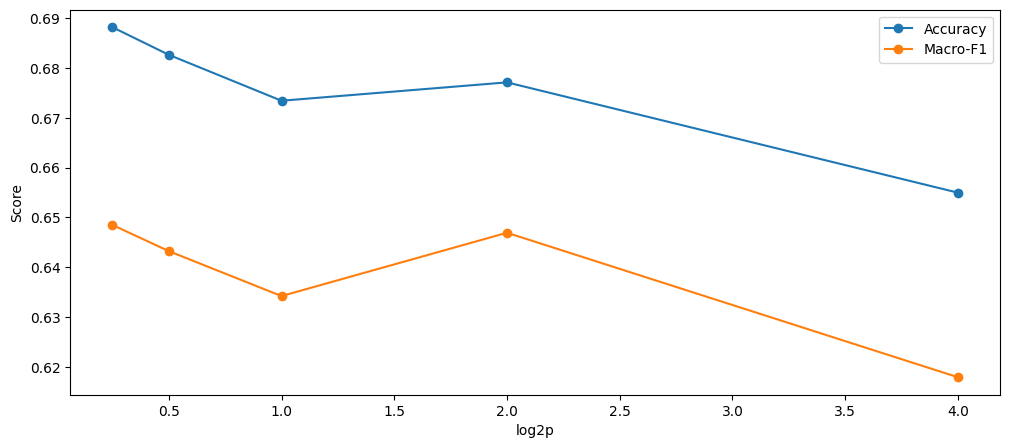

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

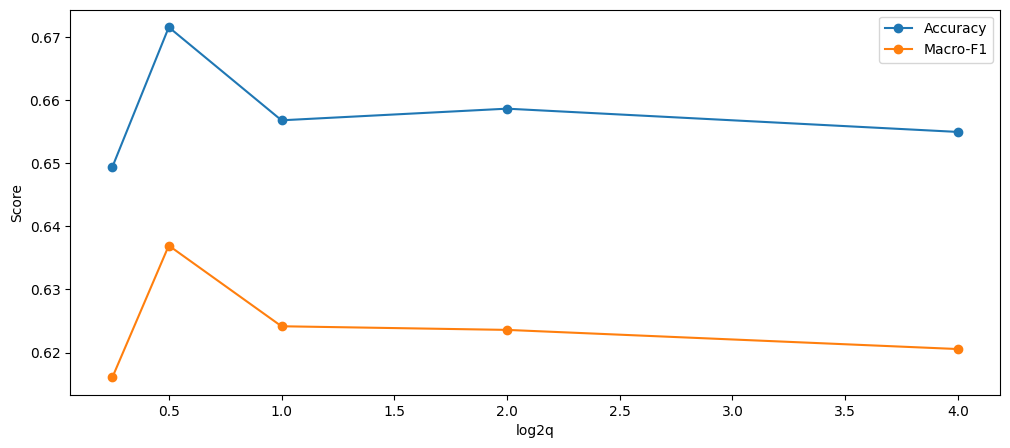

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

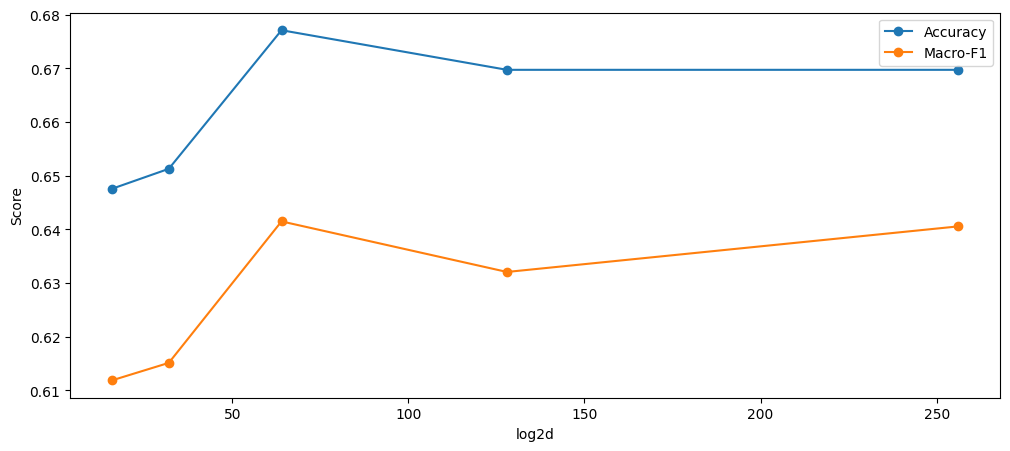

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

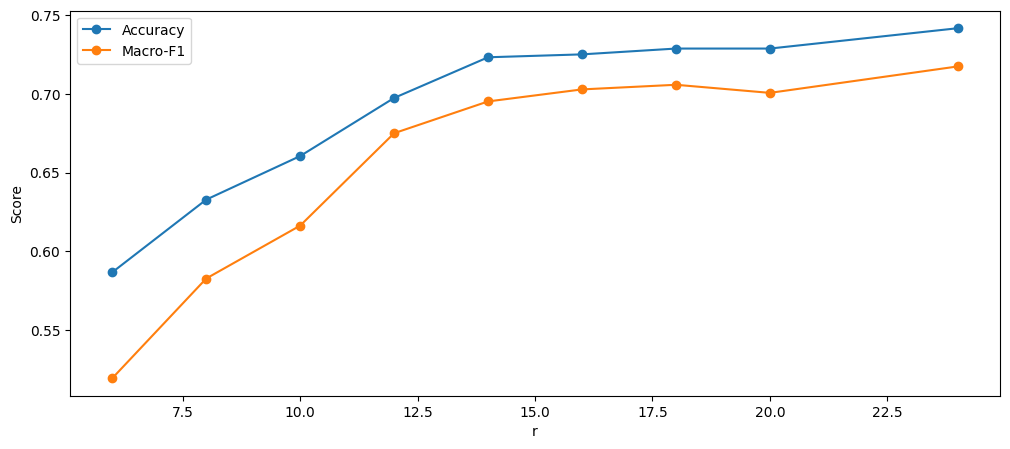

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

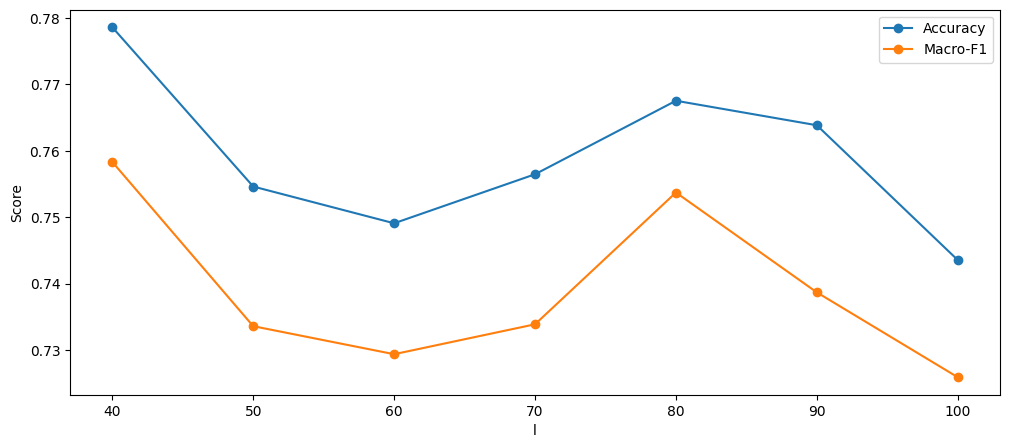

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

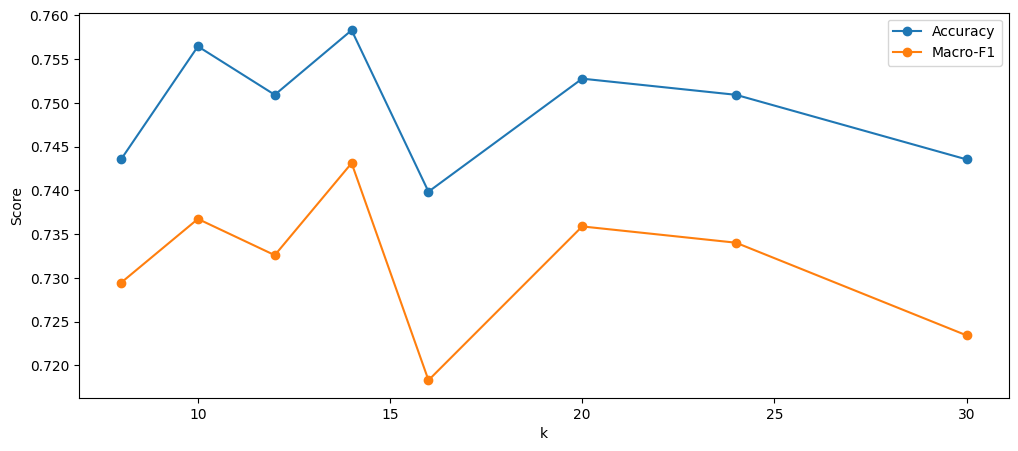

In [14]:
import networkx as nx
import pandas as pd
import numpy as np
from node2vec import Node2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

class Node2VecPipeline:
    def __init__(self, cites_path, contents_path, p=1, q=1, d=128, l=80, r=10, k=10, w=4):
        self.G = self.build_graph(cites_path)
        self.node_features, self.labels = self.load_node_data(contents_path)
        self.label_encoder = LabelEncoder()
        self.encoded_labels = self.encode_labels()
        self.p, self.q, self.d, self.l, self.r, self.k, self.w = p, q, d, l, r, k, w

    def build_graph(self, cites_path):
        G = nx.DiGraph()
        with open(cites_path, 'r') as f:
            for line in f:
                c1, c2 = map(int, line.strip().split())
                G.add_edge(c2, c1)
        return G

    def load_node_data(self, contents_path):
        node_features, labels = {}, {}
        with open(contents_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                node_id = int(parts[0])
                node_features[node_id] = list(map(int, parts[1:-1]))
                labels[node_id] = parts[-1]
        return node_features, labels

    def encode_labels(self):
        all_labels = list(self.labels.values())
        encoded_labels = self.label_encoder.fit_transform(all_labels)
        return {node_id: label for node_id, label in zip(self.labels.keys(), encoded_labels)}

    def generate_embeddings(self):
        subgraph = self.G.subgraph(self.encoded_labels.keys())
        n2v = Node2Vec(subgraph, dimensions=self.d, walk_length=self.l, num_walks=self.r, p=self.p, q=self.q, workers=self.w)
        model = n2v.fit()
        embeddings = {int(node): model.wv[str(node)] for node in subgraph.nodes()}
        embedding_df = pd.DataFrame.from_dict(embeddings, orient='index')
        embedding_df['label'] = [self.encoded_labels[node] for node in embedding_df.index]
        return embedding_df

    def evaluate_model(self, X_train, X_test, y_train, y_test):
        clf = LogisticRegression(max_iter=1000)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='macro')

    def param_sweep(self, param, values):
        accs, f1s = [], []
        for v in values:
            setattr(self, param, v)
            embedding_df = self.generate_embeddings()
            X = embedding_df.drop(columns=['label']).values
            y = embedding_df['label'].values
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
            acc, f1 = self.evaluate_model(X_train, X_test, y_train, y_test)
            accs.append(acc)
            f1s.append(f1)
        return accs, f1s

    def plot_results(self, x_vals, accs, f1s, xlabel):
        plt.figure(figsize=(12, 5))
        plt.plot(x_vals, accs, label='Accuracy', marker='o')
        plt.plot(x_vals, f1s, label='Macro-F1', marker='o')
        plt.xlabel(xlabel)
        plt.ylabel('Score')
        plt.legend()
        plt.show()

# Dataset Path
cites_path = 'S:/Fall_24/SNA/Assignment 3/cora/cora/cora.cites'
contents_path = 'S:/Fall_24/SNA/Assignment 3/cora/cora/cora.content'
pipeline = Node2VecPipeline(cites_path, contents_path)

param_sets = [("p", [0.25, 0.5, 1, 2, 4], "log2p"), ("q", [0.25, 0.5, 1, 2, 4], "log2q"),
              ("d", [16, 32, 64, 128, 256], "log2d"), ("r", [6, 8, 10, 12, 14, 16, 18, 20, 24], "r"),
              ("l", [40, 50, 60, 70, 80, 90, 100], "l"), ("k", [8, 10, 12, 14, 16, 20, 24, 30], "k")]

for param, vals, xlabel in param_sets:
    accs, f1s = pipeline.param_sweep(param, vals)
    pipeline.plot_results(vals, accs, f1s, xlabel)
